# Machine Learning Algorithms - (4) Principal Component Analysis

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## 1. What is Principal Component Analysis (PCA)?

Principal Component Analysis (PCA) is a **dimensionality reduction** technique. It transforms a high-dimensional dataset into a lower-dimensional space while preserving as much variance (information) as possible.

Key motivations:
- Reduce computational complexity.
- Remove multicollinearity.
- Visualize high-dimensional data in 2D/3D.
- De-noise data by dropping lower-variance components.

Step-by-step Intuition:

- Let $X \in \mathbb{R}^{n \times d}$ be a dataset with $n$ samples and $d$ features.
- PCA finds a set of orthogonal axes (principal components) such that:
  - The first principal component captures the maximum variance.
  - Each subsequent component captures the maximum remaining variance, subject to being orthogonal to the previous ones.


## 2. Mathematical Foundations

### 2.1. Step 1: Center the data

Subtract the mean from each feature so the dataset is centered at the origin.

$$X_{\text{centered}} = X - \bar{X}$$

### 2.2. Step 2: Compute the covariance matrix

$$C = \frac{1}{n - 1} X_{\text{centered}}^T X_{\text{centered}}$$

### 2.3. Step 3: Compute eigenvectors and eigenvalues

- Eigenvectors define the new axes (principal components).
- Eigenvalues tell us the amount of variance along each component.

### 2.4. Step 4: Project data onto top-k components

Select top $k$ eigenvectors corresponding to largest eigenvalues.

$$X_{\text{projected}} = X_{\text{centered}} \cdot W_k$$

where $W_k$ is the matrix of top-$k$ eigenvectors.

## 3. Prepare Dataset

In [3]:
X, y = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

## 4. Implement PCA

In [4]:
class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.components_ = None  # Eigenvectors
        self.mean_ = None # Feature means
        self.explained_variance_ = None  # Eigenvalues

    def fit(self, X: np.ndarray):
        # Step 1: Mean-center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Step 2: Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Step 4: Sort eigenvectors by descending eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Step 5: Keep top n_components
        self.components_ = eigenvectors[:, :self.n_components]
        self.explained_variance_ = eigenvalues[:self.n_components]

    def transform(self, X: np.ndarray) -> np.ndarray:
        X_centered = X - self.mean_
        return X_centered @ self.components_

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        self.fit(X)
        return self.transform(X)

    def explained_variance_ratio(self) -> np.ndarray:
        total_variance = np.sum(self.explained_variance_)
        return self.explained_variance_ / total_variance

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio())

Explained variance ratio: [0.76150718 0.23849282]


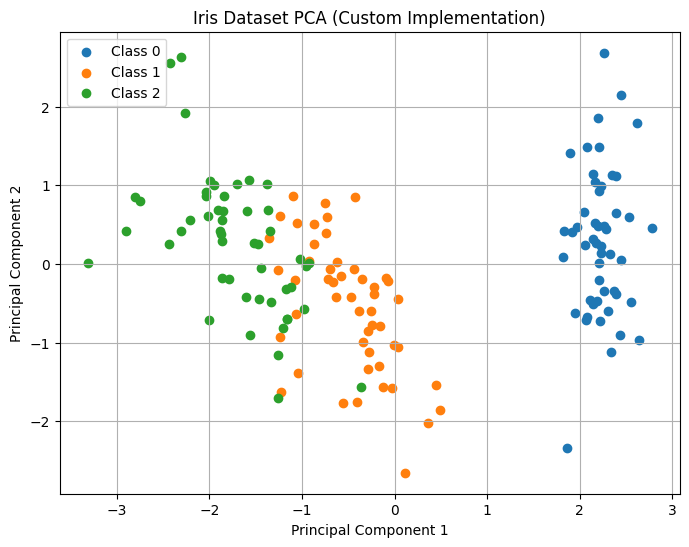

In [6]:
def plot_pca(X_pca: np.ndarray, y: np.ndarray, title: str = "PCA Projection"):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(
            X_pca[y == label, 0],
            X_pca[y == label, 1],
            label=f"Class {label}"
        )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pca(X_pca, y, title="Iris Dataset PCA (Custom Implementation)")

## 5. Summary and Takeaways

- PCA finds new axes that maximize variance.
- It uses eigenvalues and eigenvectors of the covariance matrix.
- The result is an orthogonal projection into a lower-dimensional space.
- PCA is unsupervised: it does not use labels, only the input features.

When to Use PCA?
- ✅ High-dimensional data  
- ✅ Multicollinearity  
- ✅ Need for visualization  
- ❌ Features are not linearly related  
- ❌ You want to preserve interpretability of original features